In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Fitting the spectrum
from scipy.optimize import curve_fit

#Using csv tables
import pandas as pd

The goal of this notebook is to fit the radio emission of the supernova 1993J, data can be extracted from https://iopscience.iop.org/article/10.1086/523258/pdf and is also aviable in this Github. 

# 1. Introduction.

First, we need to save all the spectrum data in python variables.

In [7]:
#Initialice the data ararys where the first value will be the wavelenght name
data=[]

data_1=[]
data_2=[]
data_3=[]
data_6=[]
data_20=[]

#Extract the data
data= pd.read_csv("Data/Datos SuperNova - 1.2_cm.csv")
data_1.extend(('1.2 cm', data))

data= pd.read_csv("Data/Datos SuperNova - 2_cm.csv")
data_2.extend(('2 cm', data))

data= pd.read_csv("Data/Datos SuperNova - 3.6_cm.csv")
data_3.extend(('3.6 cm', data))

data= pd.read_csv("Data/Datos SuperNova - 6_cm.csv")
data_6.extend(('6 cm', data))

data= pd.read_csv("Data/Datos SuperNova - 20_cm.csv")
data_20.extend(('20 cm', data))

data= []
data.extend((data_1, data_2, data_3, data_6, data_20))

#visualice the data, Flux is in mJy
data[0][1]

Days Telescope    Flux  Error
0     11.37     VLA B  18.940  1.905
1     12.33     VLA B  22.487  2.261
2     13.04     VLA B  25.753  2.576
3     13.46     VLA B  25.550  2.578
4     14.25     VLA B  28.640  2.875
..      ...       ...     ...    ...
77  3213.38   VLA D/A   2.495  0.282
78  3708.93     VLA A   1.928  0.237
79  3959.47   VLA B/C   1.792  0.191
80  4184.57     VLA A   0.967  0.217
81  4460.90   VLA B/C   0.897  0.139

[82 rows x 4 columns]

Making a plot to visualice the data.

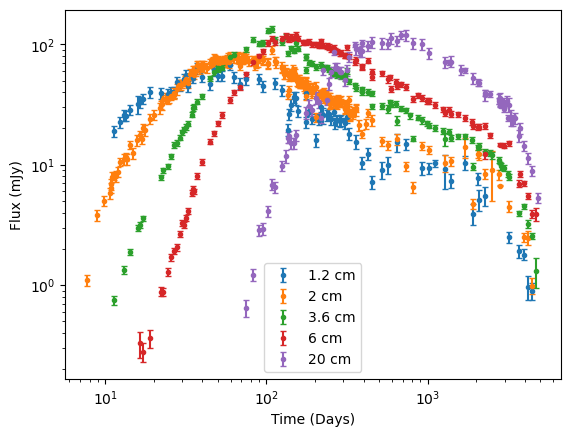

In [5]:
for wavelenght in data:
    plt.errorbar(wavelenght[1].Days, wavelenght[1].Flux, yerr=wavelenght[1].Error, 
                 fmt = '.', capsize=2, label= f'{wavelenght[0]}')
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Flux (mJy)")
plt.xlabel("Time (Days)")
plt.legend()

# 2. Theoretical preview and data.

In order to make this analysis we will be folowing the paper The role of synchrotron self-absorption in the late radio emission from SN 1993J (https://www.aanda.org/articles/aa/abs/2001/30/aah2783/aah2783.html)   (Pérez-Torres, Alberdi and Marcaide). We assume a modified standard interaction model (SIM), where we have a strong interaction between the supernova and the interacting medium; this interactions leads to a self-similarly expanding shell structure, and in this modified scenario the synchrotron emission comes from the shell formed short after the breakout. This emission is assumed to be due relativistic electron population $N(E,r)$ in a magnetic field $B(r)$, and that the injected electron distribution is driven by a power law
$$
            N(E,r)=N_0(r) E^{-p}
$$

We also have some more information from previus observations and asumptions: (i) distance to SN1993J is $D=3.6~Mpc$; (ii) the supernova exploded in March 28, 1993; (iii) supernova deceleration parameter is $m=0.86$; (iv) the width of the radio emiting shell is $\Delta R = 0.3 R_{shock}$; (v) the index of the circumstellar density is $s=1.66$ and (vi) the same temperature proffile as FB98, i.e., $T_e(r) =max\left[ T_{15}(10^{15}cm/r), 2 \cdot 10^{5}~K \right]$, where $T_{15}$ is the electron temperature in the circumstellar medium at $r= 10^{15}~cm$; in this case it is $1.7\cdot 10^6~K$.

From their VLBI observations we know that 
$$
            B \propto r^{-1} ~~~~~~~~~~~ N_0 \propto r^{-2}.
$$
The fitting parameters will be: 
    (i)   the spectral index of injected electron population, p
    (ii)  Initial magnetic field $B_0$
    (iii) Initial value of the injected function of electrons
    (iv)  Low energy cut for relativistic electrons $\gamma_{min}(r_0) = E_{min}(r_0)/m_ec^2$
The reference radius is $r_0=6.35 \cdot 10^14~cm$, corresponding to the outer shell radius at their first data point $t_0=2.34~days$. (MAYBE WE HAVE TO TRANSPORT THIS TO OUR FIRST DATA POINT I STILL DONT KNOW)